# Studing fdasrvf | Python

* Python pkg: https://github.com/jdtuck/fdasrsf_python

* All pkgs: http://research.tetonedge.net/software.html

In [1]:
# loading modules

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
from tqdm import tqdm
from time import time



# Registration packages
import fdasrsf as fs

In [4]:
df = pd.read_csv("data_temp.csv", index_col=0)
df.shape

(100, 16)

<AxesSubplot:xlabel='time'>

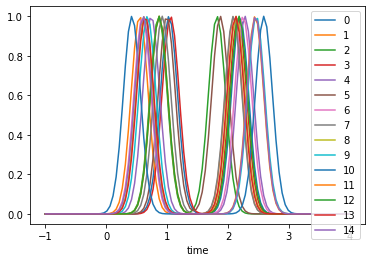

In [33]:
df.plot(x="time")

In [9]:
df.iloc[:,:-1].head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.832853e-45,9.193952e-27,2.695833e-38,1.169250e-46,1.597897e-33,7.045065e-44,2.474125e-28,9.283204e-41,1.659255e-29,3.148289e-31,1.230046e-22,1.268146e-38,1.287758e-38,6.713732e-30,9.324244e-29
1,2.894746e-43,4.306483e-25,2.773711e-36,1.976661e-44,1.207622e-31,1.015272e-41,1.301666e-26,1.111416e-38,9.501076e-28,2.035030e-29,4.170235e-21,1.331713e-36,1.351748e-36,3.953409e-28,5.058987e-27
2,4.024430e-41,1.775637e-23,2.512121e-34,2.941494e-42,8.033862e-30,1.287925e-39,6.028207e-25,1.171296e-36,4.788983e-26,1.157919e-27,1.244545e-19,1.231015e-34,1.249016e-34,2.049229e-26,2.416153e-25
3,4.925033e-39,6.444608e-22,2.002769e-32,3.853140e-40,4.704663e-28,1.438169e-37,2.457467e-23,1.086594e-34,2.124833e-24,5.799577e-26,3.269425e-18,1.001675e-32,1.015901e-32,9.350186e-25,1.015772e-23
4,5.305482e-37,2.058969e-20,1.405504e-30,4.442961e-38,2.425178e-26,1.413644e-35,8.818573e-22,8.873171e-33,8.298836e-23,2.556969e-24,7.560374e-17,7.174655e-31,7.273534e-31,3.755440e-23,3.759058e-22


In [6]:
df["time"]

0    -1.000000
1    -0.949495
2    -0.898990
3    -0.848485
4    -0.797980
        ...   
95    3.797980
96    3.848485
97    3.898990
98    3.949495
99    4.000000
Name: time, Length: 100, dtype: float64

In [10]:
f     = np.copy(df.iloc[:,:-1].values) # all cols but the last one (which is the pseudo_time)
t_vec = np.copy(df["time"].values)  # only the last col, which is the pseudo_time

print(f.shape, t_vec.shape)
print(f.dtype, t_vec.dtype)

(100, 15) (100,)
float64 float64


In [22]:
tic = time() # 

obj = fs.fdawarp(f, t_vec)

obj.srsf_align(smoothdata=False, MaxItr=5)

elapsed = time()-tic
print("- Elapsed time:")
print("%.4f (s)"%(elapsed))

Initializing...
Compute Karcher Mean of 15 function in SRSF space...
updating step: r=1
updating step: r=2
updating step: r=3
- Elapsed time:
1.0721 (s)


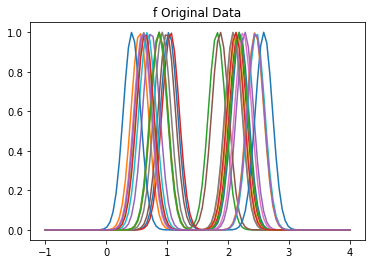

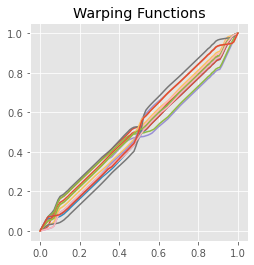

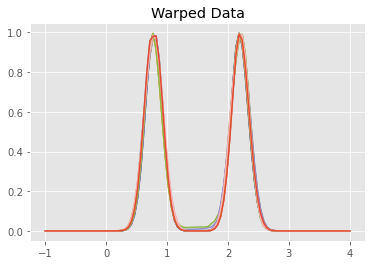

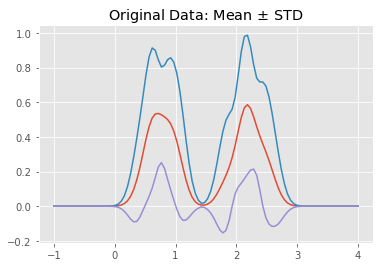

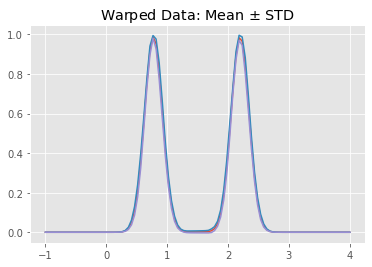

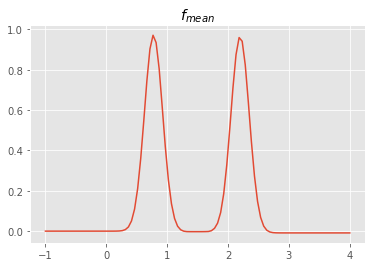

In [45]:
obj.plot()

### outro

* https://fdasrsf-python.readthedocs.io/en/latest/_modules/time_warping.html#fdawarp.multiple_align_functions

In [35]:
import fdasrsf.utility_functions as uf
from joblib import Parallel, delayed

In [40]:
omethod="DP2"
lam=0.0

grid_dim=7

In [29]:
M = f.shape[0]
N = f.shape[1]
    
eps = np.finfo(np.double).eps


# Compute SRSF function from data
f, g, g2 = uf.gradient_spline(t_vec, f, smooth=False)
q = g / np.sqrt(abs(g) + eps)

print("Initializing...")
mnq = q.mean(axis=1) # mean srvf
a = mnq.repeat(N)
d1 = a.reshape(M, N)
d = (q - d1) ** 2
dqq = np.sqrt(d.sum(axis=0))
min_ind = dqq.argmin()
mq = q[:, min_ind]
mf = f[:, min_ind]

Initializing...


In [41]:
out = Parallel(n_jobs=-2)(delayed(uf.optimum_reparam)(mq, t_vec,
                        q[:, n], omethod, lam, grid_dim) for n in range(N))
gam = np.array(out)
gam = gam.transpose()

In [43]:
gam.shape

(100, 15)

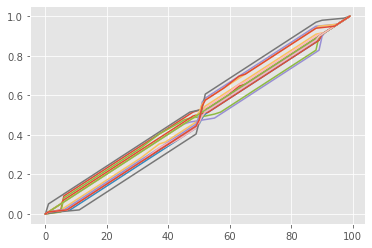

In [47]:
plt.plot(gam);

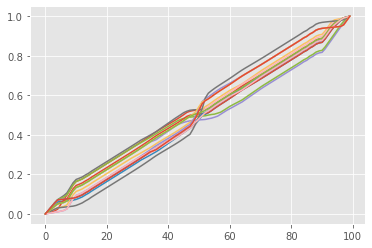

In [46]:
plt.plot(obj.gam);

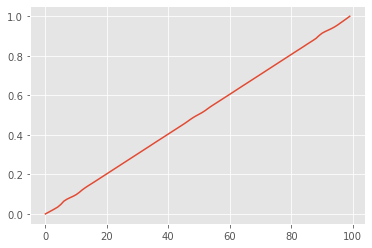

In [48]:
plt.plot(uf.SqrtMeanInverse(obj.gam));

In [31]:
mnq.shape

(100,)

<AxesSubplot:xlabel='time'>

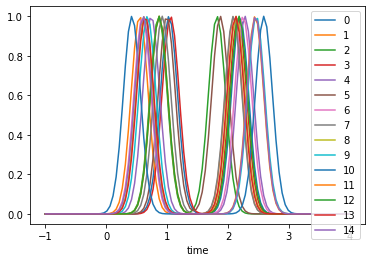

In [33]:
df.plot(x="time")

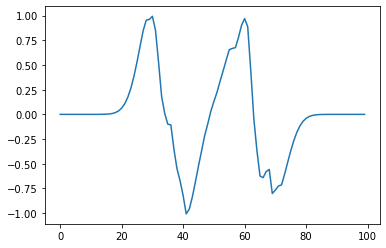

In [32]:
plt.plot(mnq)

In [50]:
tic = time() # 

obj = fs.fdawarp(f, t_vec)

obj.multiple_align_functions(mu=f[:,0], smoothdata=False)

elapsed = time()-tic
print("- Elapsed time:")
print("%.4f (s)"%(elapsed))

- Elapsed time:
0.2370 (s)


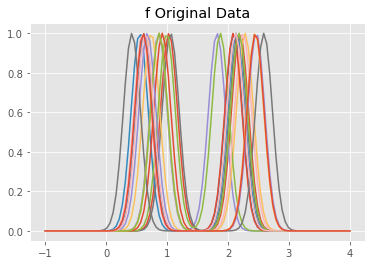

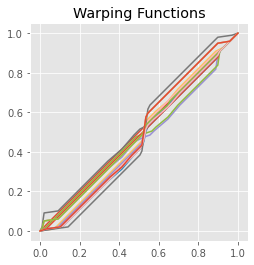

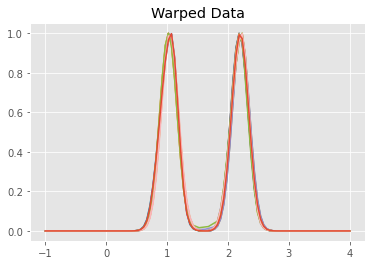

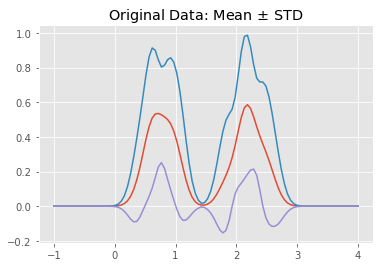

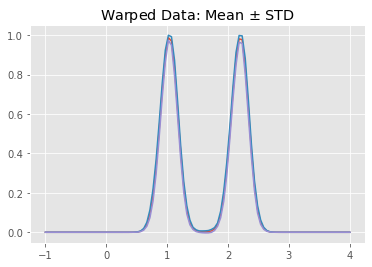

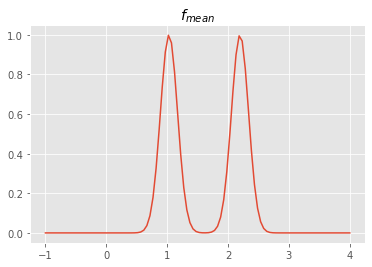

In [51]:
obj.plot()